### Bibliotecas

In [358]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Dataset

In [ ]:
#Carregar o dataset Titanic
df_train = pd.read_csv(r'C:\Python\Titanic\train.csv')

In [ ]:
# Exibir as 5 primeiras linhas do dataset
print(df_train.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [ ]:
# Exibir informações gerais sobre o DataFrame
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [ ]:
# Exibir estatísticas descritivas para as colunas numéricas
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Contar valores ausentes por coluna
print(df_train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
# Quantidade de sobreviventes
print("Quantidade de sobreviventes:", df_train['Survived'].value_counts(normalize=True))


Quantidade de sobreviventes: Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


In [ ]:
# Exibir a quantidade de valores ausentes por coluna
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Tratamento dos Dados

In [ ]:
# Excluir a coluna 'Cabin'
df_train.drop('Cabin', axis=1, inplace=True)

# Exibir a novo dataset
print(df_train.head())
print(df_train.info())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S  
<class 'pandas.core.frame.DataFrame'>


In [ ]:
# Resolvendo o problema de valores ausentes na coluna 'Embarked'
# 1. Calcular a moda da coluna 'Embarked'
moda_embarked = df_train['Embarked'].mode()[0] # [0] para pegar o primeiro valor se houver múltiplas modas
print(f"A moda da coluna 'Embarked' é: {moda_embarked}")

# 2. Preencher os valores ausentes (NaNs) na coluna 'Embarked' com a moda calculada
df_train['Embarked'].fillna(moda_embarked, inplace=True)

# 3. Verificar se os valores ausentes foram preenchidos (boa prática)
print("\nContagem de valores ausentes após preencher 'Embarked':")
print(df_train.isnull().sum())

A moda da coluna 'Embarked' é: S

Contagem de valores ausentes após preencher 'Embarked':
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64


C:\Users\NVME\AppData\Local\Temp\ipykernel_308\2126310383.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Embarked'].fillna(moda_embarked, inplace=True)


In [ ]:
# 4. Agora sim, calcular a média da coluna 'Age'
media_idade = df_train['Age'].mean()
print(f"A média da coluna 'Age' é: {media_idade:.2f}")

# 5. Calcular a mediana da coluna 'Age'
mediana_idade = df_train['Age'].median()
print(f"A mediana da coluna 'Age' é: {mediana_idade:.2f}")


A média da coluna 'Age' é: 29.70
A mediana da coluna 'Age' é: 28.00


In [ ]:
# Resolvendo o problema de valores ausentes na coluna 'Age'
# 1. Preencher os valores ausentes (NaNs) na coluna 'Age' com a moda calculada
df_train['Age'].fillna(mediana_idade, inplace=True)

# 2. Verificar se os valores ausentes foram preenchidos (boa prática)
print("\nContagem de valores ausentes após preencher 'Age':")
print(df_train.isnull().sum())


Contagem de valores ausentes após preencher 'Age':
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


C:\Users\NVME\AppData\Local\Temp\ipykernel_308\3576810113.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Age'].fillna(mediana_idade, inplace=True)


### Insight Sobre a Relação entre Sexo e Sobreviventes

In [ ]:
# Calcular a contagem de sobreviventes e não-sobreviventes para cada sexo
print("Contagem de sobreviventes (1) e não-sobreviventes (0) por Sexo:")
print(df_train.groupby('Sex')['Survived'].value_counts())

Contagem de sobreviventes (1) e não-sobreviventes (0) por Sexo:
Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64


In [ ]:
# Para ter uma visão mais completa, vamos também calcular a proporção
print("\nProporção de sobreviventes (1) e não-sobreviventes (0) por Sexo:")
print(df_train.groupby('Sex')['Survived'].value_counts(normalize=True))


Proporção de sobreviventes (1) e não-sobreviventes (0) por Sexo:
Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: proportion, dtype: float64


In [ ]:
# Vamos calcular a proporção de mulheres e homens DENTRO do grupo de sobreviventes

# Filtrar o DataFrame para incluir apenas os sobreviventes
survivors_df = df_train[df_train['Survived'] == 1]

# Calcular a proporção de sexo dentro do grupo de sobreviventes
print("Proporção de Mulheres e Homens entre os Sobreviventes:")
print(survivors_df['Sex'].value_counts(normalize=True))

Proporção de Mulheres e Homens entre os Sobreviventes:
Sex
female    0.681287
male      0.318713
Name: proportion, dtype: float64


In [ ]:
# Vamos calcular a proporção de mulheres e homens DENTRO do grupo de não-sobreviventes

# Filtrar o DataFrame para incluir apenas os não-sobreviventes
survivors_df = df_train[df_train['Survived'] == 0]

# Calcular a proporção de sexo dentro do grupo de não-sobreviventes
print("Proporção de Mulheres e Homens entre os não-Sobreviventes:")
print(survivors_df['Sex'].value_counts(normalize=True))

Proporção de Mulheres e Homens entre os não-Sobreviventes:
Sex
male      0.852459
female    0.147541
Name: proportion, dtype: float64


### Insight Sobre a Relação entre Classe e Sobreviventes

In [ ]:
# Calcular a contagem de sobreviventes e não-sobreviventes para cada classe
print("Contagem de sobreviventes (1) e não-sobreviventes (0) por Classe:")
print(df_train.groupby('Pclass')['Survived'].value_counts())

Contagem de sobreviventes (1) e não-sobreviventes (0) por Classe:
Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64


In [ ]:
# Para ter uma visão mais completa, vamos também calcular a proporção
print("\nProporção de sobreviventes (1) e não-sobreviventes (0) por Classe:")
print(df_train.groupby('Pclass')['Survived'].value_counts(normalize=True))


Proporção de sobreviventes (1) e não-sobreviventes (0) por Classe:
Pclass  Survived
1       1           0.629630
        0           0.370370
2       0           0.527174
        1           0.472826
3       0           0.757637
        1           0.242363
Name: proportion, dtype: float64


In [ ]:
# Vamos calcular a proporção das 3 classes DENTRO do grupo de sobreviventes

# Filtrar o DataFrame para incluir apenas os sobreviventes
survivors_df = df_train[df_train['Survived'] == 1]

# Calcular a proporção de classe dentro do grupo de sobreviventes
print("Proporção das 3 classes entre os Sobreviventes:")
print(survivors_df['Pclass'].value_counts(normalize=True))

Proporção das 3 classes entre os Sobreviventes:
Pclass
1    0.397661
3    0.347953
2    0.254386
Name: proportion, dtype: float64


In [ ]:
# Vamos calcular a proporção das 3 classes DENTRO do grupo de não-sobreviventes

# Filtrar o DataFrame para incluir apenas os não-sobreviventes
survivors_df = df_train[df_train['Survived'] == 0]

# Calcular a proporção de classe dentro do grupo de não-sobreviventes
print("Proporção das 3 classes entre os não-Sobreviventes:")
print(survivors_df['Pclass'].value_counts(normalize=True))

Proporção das 3 classes entre os não-Sobreviventes:
Pclass
3    0.677596
2    0.176685
1    0.145719
Name: proportion, dtype: float64


### Insight Sobre a Relação entre Idade e Sobreviventes

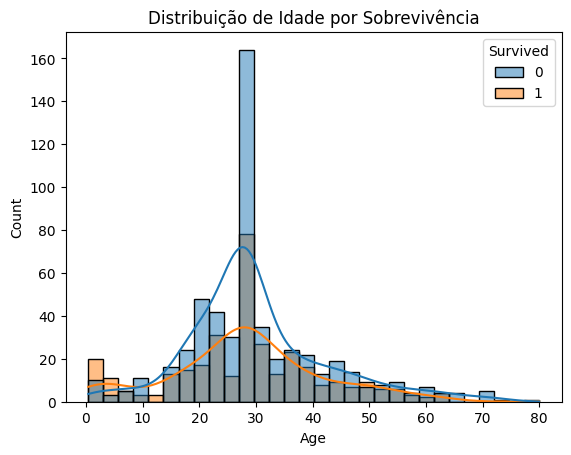

In [ ]:
sns.histplot(data=df_train, x='Age', hue='Survived', kde=True)
plt.title('Distribuição de Idade por Sobrevivência')
plt.show()

### Insight Sobre a Relação entre Tarifa e Sobreviventes

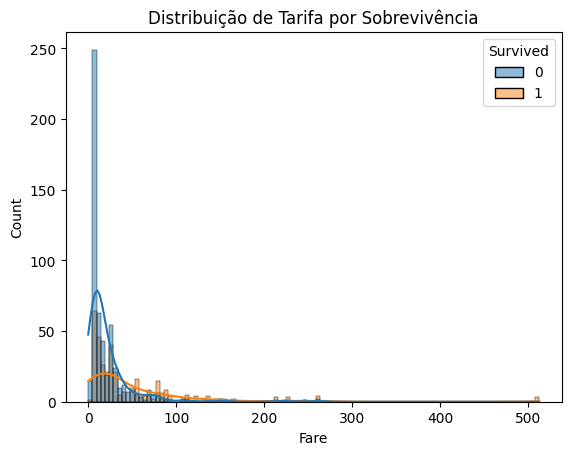

In [ ]:
sns.histplot(data=df_train, x='Fare', hue='Survived', kde=True)
plt.title('Distribuição de Tarifa por Sobrevivência')
plt.show()

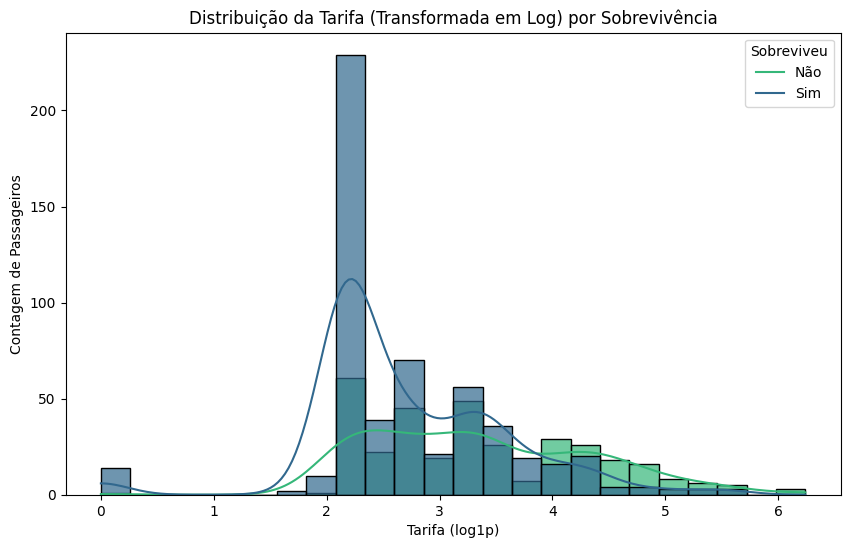

In [ ]:
# Aplicar a transformação logarítmica à coluna 'Fare'
# Criaremos uma nova coluna para armazenar a tarifa transformada, para manter a original.
df_train['Fare_log'] = np.log1p(df_train['Fare'])

# Gerar o histograma/KDE da nova coluna 'Fare_log' vs. 'Survived'
plt.figure(figsize=(10, 6))
sns.histplot(data=df_train, x='Fare_log', hue='Survived', kde=True, palette='viridis', alpha=0.7)
plt.title('Distribuição da Tarifa (Transformada em Log) por Sobrevivência')
plt.xlabel('Tarifa (log1p)')
plt.ylabel('Contagem de Passageiros')
plt.legend(title='Sobreviveu', labels=['Não', 'Sim'])
plt.show()

### Insight Sobre a Relação entre tamanho da familia e Sobreviventes

In [ ]:
# Criando a coluna 'FamilySize'
df_train['FamilySize'] = df_train['SibSp'] + df_train["Parch"] + 1

In [ ]:
# Calcular a contagem de sobreviventes e não-sobreviventes para cada tamanho de família
print("Contagem de sobreviventes (1) e não-sobreviventes (0) por tamanho de família:")
print(df_train.groupby('FamilySize')['Survived'].value_counts())

Contagem de sobreviventes (1) e não-sobreviventes (0) por tamanho de família:
FamilySize  Survived
1           0           374
            1           163
2           1            89
            0            72
3           1            59
            0            43
4           1            21
            0             8
5           0            12
            1             3
6           0            19
            1             3
7           0             8
            1             4
8           0             6
11          0             7
Name: count, dtype: int64


In [ ]:
# Para ter uma visão mais completa, vamos também calcular a proporção
print("\nProporção de sobreviventes (1) e não-sobreviventes (0) por tamanho de família:")
print(df_train.groupby('FamilySize')['Survived'].value_counts(normalize=True))


Proporção de sobreviventes (1) e não-sobreviventes (0) por tamanho de família:
FamilySize  Survived
1           0           0.696462
            1           0.303538
2           1           0.552795
            0           0.447205
3           1           0.578431
            0           0.421569
4           1           0.724138
            0           0.275862
5           0           0.800000
            1           0.200000
6           0           0.863636
            1           0.136364
7           0           0.666667
            1           0.333333
8           0           1.000000
11          0           1.000000
Name: proportion, dtype: float64


In [ ]:
# Vamos calcular a proporção de tamanho de família DENTRO do grupo de sobreviventes

# Filtrar o DataFrame para incluir apenas os sobreviventes
survivors_df = df_train[df_train['Survived'] == 1]

# Calcular a proporção de tamanho de família dentro do grupo de sobreviventes
print("Proporção de tamanho de família entre os Sobreviventes:")
print(survivors_df['FamilySize'].value_counts(normalize=True))

Proporção de tamanho de família entre os Sobreviventes:
FamilySize
1    0.476608
2    0.260234
3    0.172515
4    0.061404
7    0.011696
6    0.008772
5    0.008772
Name: proportion, dtype: float64


In [ ]:
# Vamos calcular a proporção de tamanho de família DENTRO do grupo de não-sobreviventes

# Filtrar o DataFrame para incluir apenas os não-sobreviventes
survivors_df = df_train[df_train['Survived'] == 0]

# Calcular a proporção de tamanho de família dentro do grupo de não-sobreviventes
print("Proporção de tamanho de família entre os não-Sobreviventes:")
print(survivors_df['FamilySize'].value_counts(normalize=True))

Proporção de tamanho de família entre os não-Sobreviventes:
FamilySize
1     0.681239
2     0.131148
3     0.078324
6     0.034608
5     0.021858
7     0.014572
4     0.014572
11    0.012750
8     0.010929
Name: proportion, dtype: float64


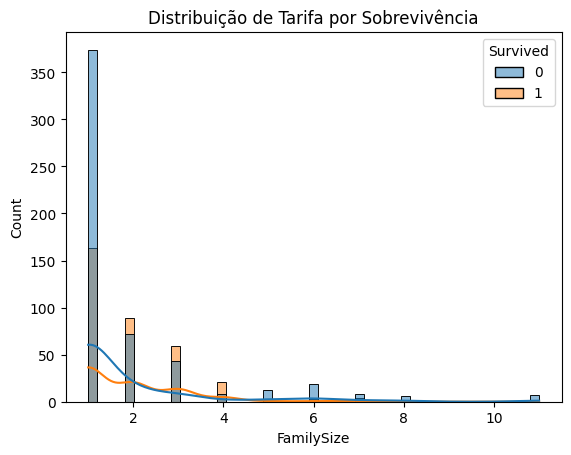

In [ ]:
# Gerar o histograma/KDE da coluna 'FamilySize' vs. 'Survived'
sns.histplot(data=df_train, x='FamilySize', hue='Survived', kde=True)
plt.title('Distribuição de Tarifa por Sobrevivência')
plt.show()

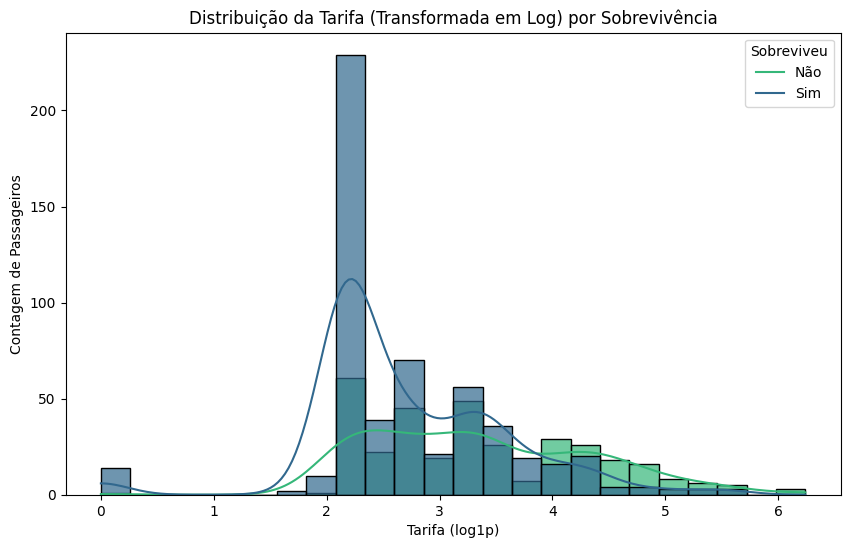

In [ ]:
# Aplicar a transformação logarítmica à coluna 'FamilySize'
# Criaremos uma nova coluna para armazenar a tarifa transformada, para manter a original.
df_train['FamilySize_log'] = np.log1p(df_train['FamilySize'])

# Gerar o histograma/KDE da nova coluna 'FamilySize_log' vs. 'Survived'
plt.figure(figsize=(10, 6))
sns.histplot(data=df_train, x='Fare_log', hue='Survived', kde=True, palette='viridis', alpha=0.7)
plt.title('Distribuição da Tarifa (Transformada em Log) por Sobrevivência')
plt.xlabel('Tarifa (log1p)')
plt.ylabel('Contagem de Passageiros')
plt.legend(title='Sobreviveu', labels=['Não', 'Sim'])
plt.show()

### Preparar Os Dados Para Modelagem

In [ ]:
# Aplicar One-Hot Encoding na coluna "Sex"
df_train_encoded = pd.get_dummies(
    df_train, 
    prefix=None, 
    prefix_sep='_', 
    dummy_na=False, 
    columns=['Sex'], 
    sparse=False, 
    drop_first=False, 
    dtype=None)

In [ ]:
# Aplicar One-Hot Encoding na coluna "Embarked"
df_train_encoded = pd.get_dummies(
    df_train_encoded, 
    prefix=None, 
    prefix_sep='_', 
    dummy_na=False, 
    columns=['Embarked'], 
    sparse=False, 
    drop_first=False, 
    dtype=None)

In [ ]:
# Exibir as 5 primeiras linhas do dataset modelado
print(df_train_encoded.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare  Fare_log  FamilySize  FamilySize_log  \
0         A/5 21171   7.2500  2.110213           2        1.098612   
1          PC 17599  71.2833  4.280593           2        1.098612   
2  STON/O2. 3101282   7.9250  2.188856           1        0.693147   
3            113803  53.1000  3.990834        

In [ ]:
# Exibir informações gerais sobre o DataFrame modelado
print(df_train_encoded.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     891 non-null    int64  
 1   Survived        891 non-null    int64  
 2   Pclass          891 non-null    int64  
 3   Name            891 non-null    object 
 4   Age             891 non-null    float64
 5   SibSp           891 non-null    int64  
 6   Parch           891 non-null    int64  
 7   Ticket          891 non-null    object 
 8   Fare            891 non-null    float64
 9   Fare_log        891 non-null    float64
 10  FamilySize      891 non-null    int64  
 11  FamilySize_log  891 non-null    float64
 12  Sex_female      891 non-null    bool   
 13  Sex_male        891 non-null    bool   
 14  Embarked_C      891 non-null    bool   
 15  Embarked_Q      891 non-null    bool   
 16  Embarked_S      891 non-null    bool   
dtypes: bool(5), float64(4), int64(6), o

In [ ]:
# Exibir estatísticas descritivas para as colunas numéricas
df_train_encoded.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Fare_log,FamilySize,FamilySize_log
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,2.962246,1.904602,0.967890
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,0.969048,1.613459,0.402669
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,1.000000,0.693147
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,2.187218,1.000000,0.693147
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,2.737881,1.000000,0.693147
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,3.465736,2.000000,1.098612
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,6.240917,11.000000,2.484907


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [ ]:
# Escalonar os dados
